In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.signal import convolve
import scipy.signal

%load_ext autoreload
%autoreload 2

from src.datasets import generate_random_binary_array_with_squares, generate_random_array_with_correlated_noise, generate_two_dim_sin_cos_wave
from src.aggregation_functions import agg_function

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\cwinklm\Documents\AggroUQ\src\datasets.py:104: SyntaxWarning: invalid escape sequence '\s'
c:\Users\cwinklm\Documents\AggroUQ\src\datasets.py:104: SyntaxWarning: invalid escape sequence '\p'
c:\Users\cwinklm\Documents\AggroUQ\src\datasets.py:104: SyntaxWarning: invalid escape sequence '\c'
c:\Users\cwinklm\Documents\AggroUQ\src\datasets.py:104: SyntaxWarning: invalid escape sequence '\p'


# Examples of the random square dataset

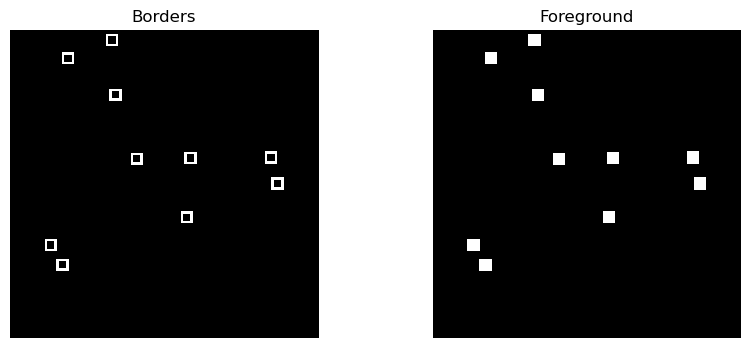

In [9]:
array_size = 500
num_squares = 10
square_size = 20

array, fg = generate_random_binary_array_with_squares(array_size, num_squares, square_size, square_size_var=0.01, width=4, intersect=False, FG=True)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(array, interpolation="none", cmap="gray")
plt.axis("off")
plt.title("Borders")

plt.subplot(1, 2, 2)
plt.imshow(fg, interpolation="none", cmap="gray")

plt.axis("off")
plt.title("Foreground")

plt.show()

In [8]:
iters = 50
size = 500
agg_method = "threshold"
square_sizes = [10, 50, 100, 150]


mean_arrays = []
examples = []

for avg_ss in square_sizes: 
    mean_array = []
    for i in range(iters):
        array, fg = generate_random_binary_array_with_squares(size, num_squares=10, square_size_mean=avg_ss,
                                                              square_size_var=0.01, width=4, intersect=False, FG=True)
        mean_array.append(agg_function(array, agg_method, patch_size=100, foreground_pixel_map=fg))
        if i == 0:
            examples.append(array)
    mean_arrays.append(mean_array)


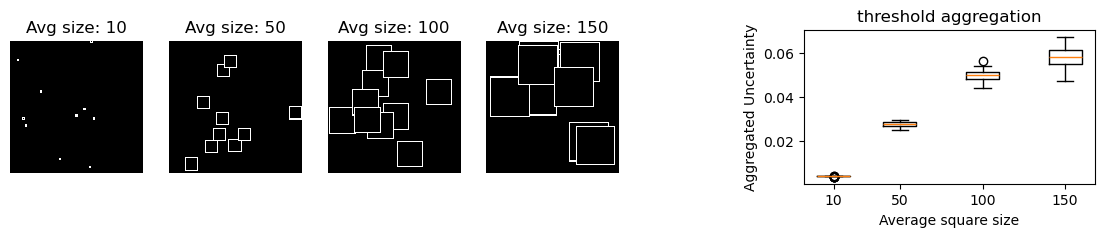

In [9]:
plt.figure(figsize=(14, 2))
n_figures = len(examples)+1
gs = GridSpec(1, n_figures+2, height_ratios=[1], width_ratios=[1]*(n_figures+2))
for i in range(n_figures-1):
    
    plt.subplot(gs[0, i])# subplot(1, n_figures, i+1)
    plt.imshow(examples[i], interpolation="none", cmap="gray")
    plt.axis("off")
    plt.title(f"Avg size: {square_sizes[i]}")

plt.subplot(gs[0, (n_figures):])
plt.boxplot(mean_arrays, positions=square_sizes, widths=20)
plt.xlabel("Average square size")
plt.ylabel("Aggregated Uncertainty")
plt.title(f"{agg_method} aggregation")
plt.show()

## Compare Aggregation methods 

In [10]:
aggregation_args = {"image-level": ("mean",), 
                    "patch-level-16": ("patch", 32),
                    "patch-level-64": ("patch", 64),
                    "patch-level-128": ("patch", 128),
                    "threshold": ("threshold",)}

In [12]:
size = 500
iters = 50
sizes = [10, 50, 100, 150]
res = {agg_arg:{} for agg_arg in aggregation_args}

examples = []

for avg_ss in sizes: 
    for agg_arg in aggregation_args:
        res[agg_arg][avg_ss] = []
    for i in range(iters):

        array, fg = generate_random_binary_array_with_squares(shape=(size, size),  num_squares=10, square_size_mean=avg_ss, 
                                                              square_size_var=0.01, width=4, intersect=False, FG=True)
        for agg_arg in aggregation_args:
            res[agg_arg][avg_ss].append(agg_function(array, foreground_pixel_map=fg, *aggregation_args[agg_arg]))
        if i == 0:
            examples.append(array)

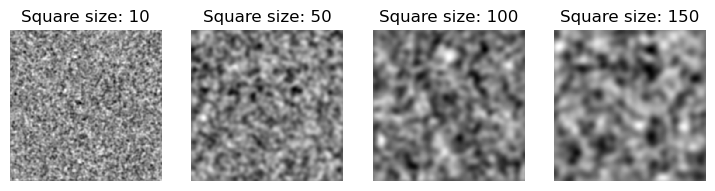

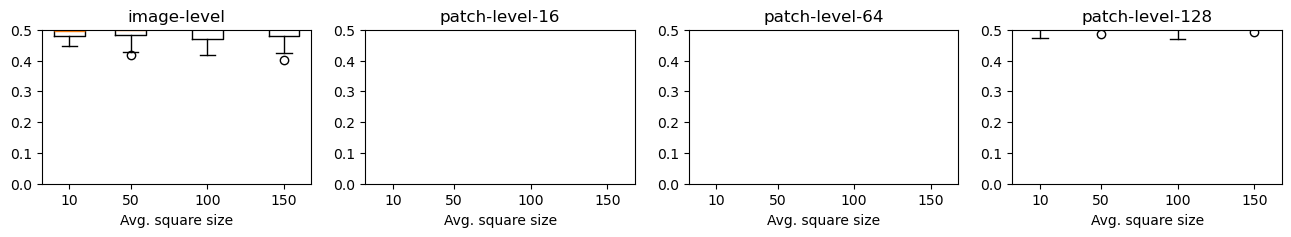

In [25]:
plt.figure(figsize=(16,4))
for i in range(n_figures-1):
    
    plt.subplot(gs[0, i])# subplot(1, n_figures, i+1)
    plt.imshow(examples[i], interpolation="none", cmap="gray")
    plt.axis("off")
    plt.title(f"Square size: {sizes[i]}")
plt.show()

plt.figure(figsize=(16, 2))
for i, agg_arg in enumerate(res.keys()):
    plt.subplot(1, len(res.keys()), i+1)
    plt.boxplot(res[agg_arg].values(), positions=sizes, widths=20)
    plt.title(agg_arg)
    plt.ylim(0, 0.5)
    plt.xlabel("Avg. square size")
plt.show()

# Spatially correlated noise 

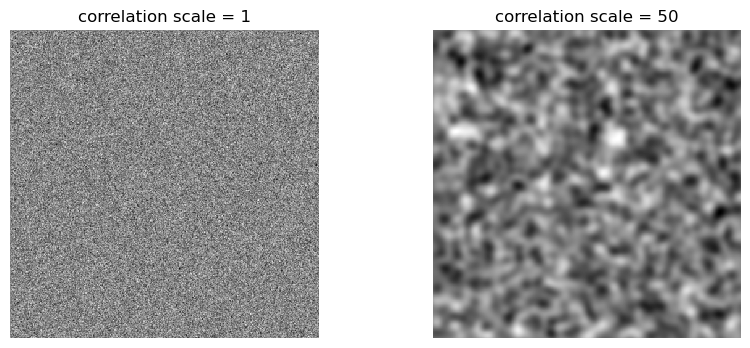

In [26]:
#Example of correlated noise
corr_noise_array_1 = generate_random_array_with_correlated_noise(500, 1)
corr_noise_array_50 = generate_random_array_with_correlated_noise(500, 50)

plt.figure(figsize=(10, 4)) 
plt.subplot(1, 2, 1)
plt.imshow(corr_noise_array_1, interpolation="none", cmap="gray")
plt.title("correlation scale = 1")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(corr_noise_array_50, interpolation="none", cmap="gray")
plt.title("correlation scale = 50")
plt.axis("off")
plt.show()

In [13]:
aggregation_args = {"image-level": ("mean",), 
                    "patch-level-16": ("patch", 32),
                    "patch-level-64": ("patch", 64),
                    "patch-level-128": ("patch", 128)}

In [21]:
iters = 50
array_size = 500
corr_sizes = [10, 50, 100, 150]
res = {agg_arg:{} for agg_arg in aggregation_args}

examples = []

for avg_ss in corr_sizes: 
    for agg_arg in aggregation_args:
        res[agg_arg][avg_ss] = []
    for i in range(iters):

        array = generate_random_array_with_correlated_noise(array_size, avg_ss)
        for agg_arg in aggregation_args:
            res[agg_arg][avg_ss].append(agg_function(array, foreground_pixel_map=fg, *aggregation_args[agg_arg]))
        if i == 0:
            examples.append(array)


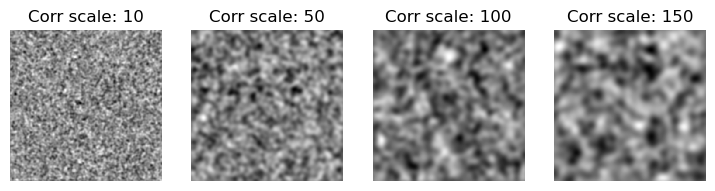

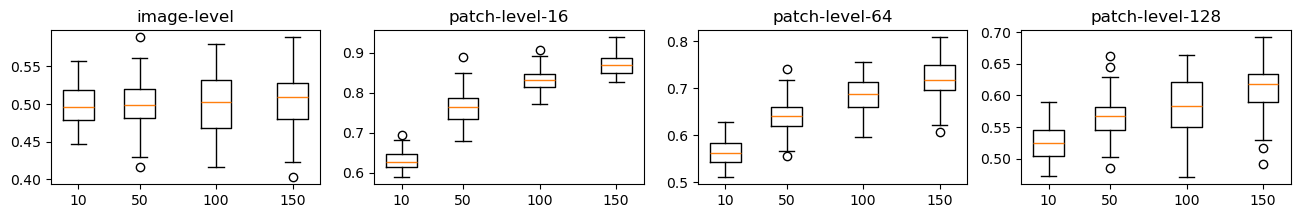

In [24]:
plt.figure(figsize=(16, 4))

for i in range(n_figures-1):
    
    plt.subplot(gs[0, i])# subplot(1, n_figures, i+1)
    plt.imshow(examples[i], interpolation="none", cmap="gray")
    plt.axis("off")
    plt.title(f"Corr scale: {sizes[i]}")
plt.show()

plt.figure(figsize=(16, 2))
for i, agg_arg in enumerate(res.keys()):
    plt.subplot(1, len(res.keys()), i+1)
    plt.boxplot(res[agg_arg].values(), positions=sizes, widths=20)
    plt.title(agg_arg)
    #plt.ylim(0, 0.5)

# Autocorrelation and Fourier-Analyis

In [65]:
array_size = 20
corr_scales = [1, 5, 200]

data_list = [generate_random_array_with_correlated_noise(array_size, cs) for cs in corr_scales]
corr_list = [scipy.signal.correlate(data, data) for data in data_list]
psd_list = [np.abs(np.fft.fftshift(np.fft.fft2(corr))) for corr in corr_list]

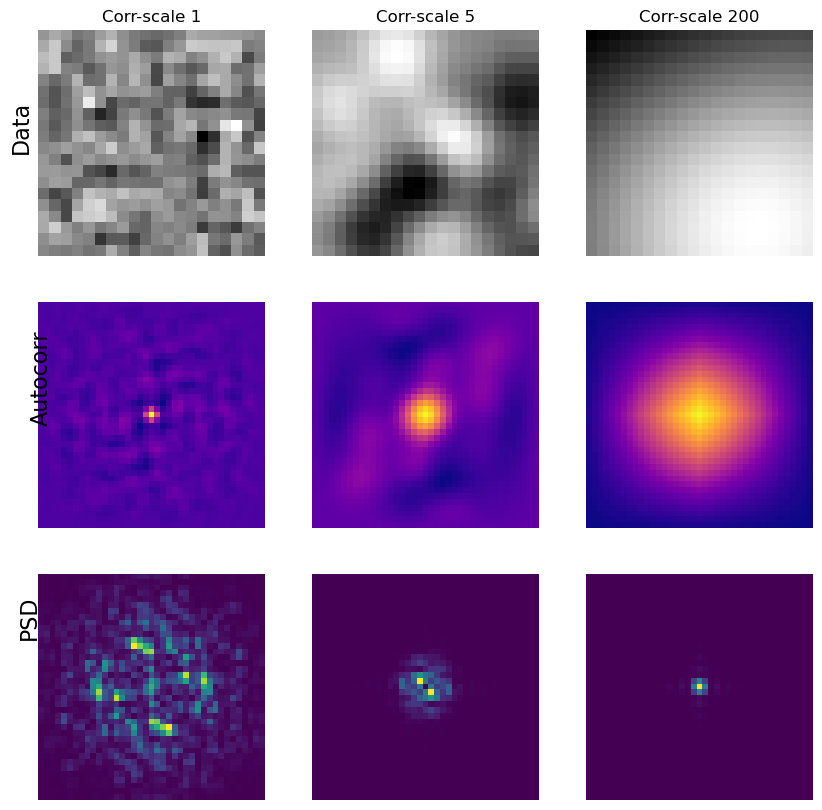

In [66]:


plt.figure(figsize=(10,10))

for i in range(len(data_list)):

    plt.subplot(3, 3, i+1)
    plt.imshow(data_list[i], cmap='grey', interpolation='none')
    plt.title(f"Corr-scale {corr_scales[i]}")
    if i == 0:
        plt.text(-array_size*0.1, array_size/2, "Data", fontsize=16, ha="center", rotation=90)
    plt.axis("off")
    

    plt.subplot(3, 3, i+4)
    plt.imshow(corr_list[i], cmap='plasma', interpolation='none')
    if i == 0:
        plt.text(-array_size*0.1, array_size, "Autocorr", fontsize=16, rotation=90)
    plt.axis("off")

    plt.subplot(3, 3, i+7)
    plt.imshow(psd_list[i], cmap='viridis', interpolation='none')
    if i == 0:
        plt.text(-array_size*0.1, array_size/2, "PSD", fontsize=16, ha="center", rotation=90)
    plt.axis("off")

plt.show()

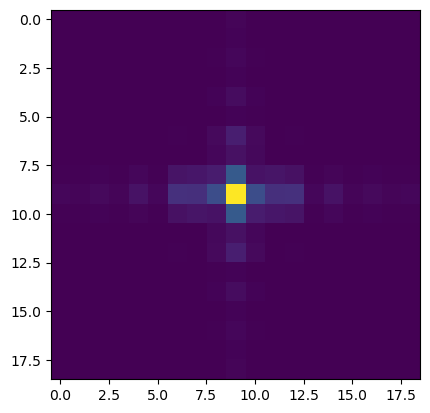

In [ ]:
#data1 = np.random.randn(10, 10)
data1 = generate_random_array_with_correlated_noise(10, 10)



plt.imshow(psd, cmap='viridis', interpolation='none')

Text(0.5, 1.0, 'PSD')

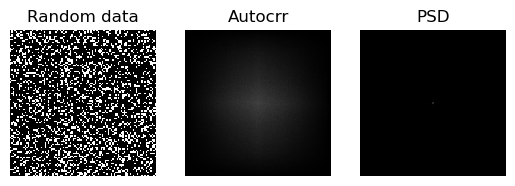

In [57]:
p = 0.75
data_rand = np.random.rand(100, 100)
data_rand = (data_rand > p).astype(int)

corr = scipy.signal.correlate(data_rand, data_rand)
psd = np.abs(np.fft.fftshift(np.fft.fft2(corr)))


plt.subplot(131)
plt.imshow(data_rand, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("Random data")

plt.subplot(132)
plt.imshow(corr, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("Autocrr")

plt.subplot(133)
plt.imshow(psd, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("PSD")

Text(0.5, 1.0, 'PSD')

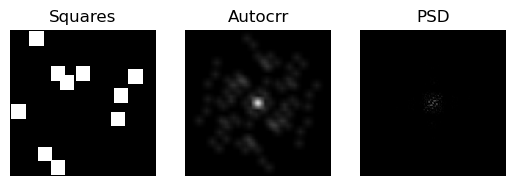

In [68]:
array, fg = generate_random_binary_array_with_squares((100, 100), 10, 10, square_size_var=0.01, width=1, intersect=False, FG=True)
corr = scipy.signal.correlate(fg, fg)
psd = np.abs(np.fft.fftshift(np.fft.fft2(corr)))

plt.subplot(131)
plt.imshow(fg, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("Squares")

plt.subplot(132)
plt.imshow(corr, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("Autocrr")

plt.subplot(133)
plt.imshow(psd, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("PSD")

Text(0.5, 1.0, 'PSD')

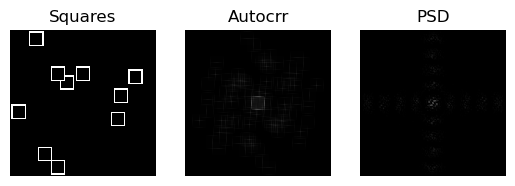

In [69]:
corr = scipy.signal.correlate(array, array)
psd = np.abs(np.fft.fftshift(np.fft.fft2(corr)))

plt.subplot(131)
plt.imshow(array, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("Squares")

plt.subplot(132)
plt.imshow(corr, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("Autocrr")

plt.subplot(133)
plt.imshow(psd, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("PSD")

# Sin and Cos waves


Text(0.5, 0.98, '${\\sin}$(${2\\pi}$*0.4*x + 0) + ${\\cos}$(${2\\pi}$*0.2*y + 0)')

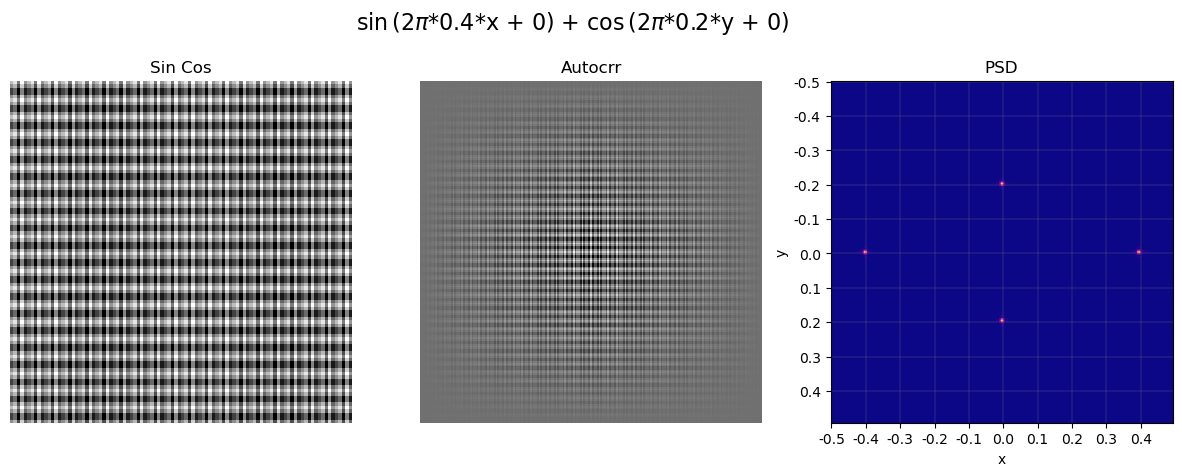

In [7]:
sin_cos_arr, arr_str = generate_two_dim_sin_cos_wave(100, 100, freq_x=0.4, freq_y=0.2, phase_x=0, phase_y=0)

corr = scipy.signal.correlate(sin_cos_arr, sin_cos_arr)
psd = np.abs(np.fft.fftshift(np.fft.fft2(corr)))

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(sin_cos_arr, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("Sin Cos")

plt.subplot(132)
plt.imshow(corr, cmap='gray', interpolation='none')
plt.axis("off")
plt.title("Autocrr")

plt.subplot(133)
plt.imshow(psd, cmap="plasma")
#.colorbar()

plt.xticks([i for i in range(0, 199, 20)], [i/200 for i in range(-100, 100, 20)])
plt.xlabel("x")
plt.yticks([i for i in range(0, 199, 20)], [i/200 for i in range(-100, 100, 20)])
plt.ylabel("y")
plt.grid(color="grey", linewidth=0.2)
#plt.imshow(psd, cmap='gray', interpolation='none')
#plt.axis("off")
plt.title("PSD")


plt.suptitle(r"{}".format(arr_str), size=16)